# Простой маятник

In [1]:
using Plots

Рассмотрим [*маятник Фуко*, расположенный в NTNU](https://www.ntnu.no/fysikk/foucault) в Тронхейме. Он состоит из стального шара $40\;\mathrm{kg}$ с радиусом $r=10\;\mathrm{cm}$, подвешенного на стальной проволоке $25\;\mathrm{m}$. Маятник приводится в движение электромагнитом, расположенным под маятником, что гарантирует, что он никогда не перестанет колебаться. Его период для малых амплитуд $T=2\pi\sqrt{L/g}=10\;\mathrm{s}$. 

In [2]:
g = 9.81 # м/с^2
L = 25   # м
m = 40   # кг
# Оценивает аналитическое приближение
approx(t, theta0) = @. theta0*cos(t*sqrt(g/L))
# Возвращает правую часть обыкновенного 
# дифференциального уравнения, описывающего простой маятник
RHS(theta, w, dt) = begin
    dw = -sin(theta)*dt*g/L
    dtheta = w*dt
    return dtheta, dw
end
# Выполняет один шаг метода Эйлера
euler_step(theta, w, dt) = begin
    dtheta, dw = RHS(theta, w, dt)
    w += dw
    theta += dtheta
    return theta, w
end
# Выполняет метод Эйлера
euler_method(theta0, w0, dt, n) = begin
    theta = zeros(n)
    w = zeros(n)
    theta[1] = theta0
    w[1] = w0
    
    for i in 2:n
        theta[i], w[i] = euler_step(theta[i-1], w[i-1], dt) 
    end
    return theta, w
end


euler_method (generic function with 1 method)

Теперь мы можем выполнить метод Эйлера и построить график результата. Построим решение для двух разных начальных углов $\theta=\{15^\circ, 60^\circ\}=\{\pi/6, \pi/3\}$ и сравним с аналитическим приближением.

In [3]:
theta01 = pi/12
theta02 = pi/3
T = 20
n = 2^13
t = range(0, T, n)
dt = T/n

theta1, w1 = euler_method(theta01, 0, dt, n)
theta2, w2 = euler_method(theta02, 0, dt, n);

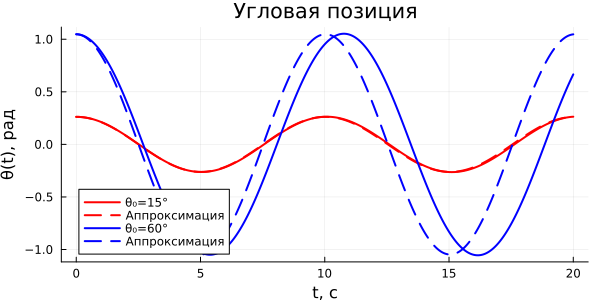

In [4]:
plot(t, theta1, line = (2, :red), lab = "θ₀=$(round(Int,theta01*180/pi))°")
plot!(t, approx(t, theta01), line = (2, :red, :dash), lab = "Аппроксимация")
plot!(t, theta2, line = (2, :blue), lab = "θ₀=$(round(Int,theta02*180/pi))°")
plot!(t, approx(t, theta02), line = (2, :blue, :dash), lab = "Аппроксимация")
plot!(title = "Угловая позиция", xlab = "t, с", ylab = "θ(t), рад", size = (600, 300))

Аппроксимация для малого начального угла довольно хороша, но по мере увеличения начального угла аппроксимация становится менее точной. 

## Сохранение энергии

Общая механическая энергия,
\begin{equation}
E = U + K = mgL(1 - \cos\theta) + \frac{1}{2}mL^2\dot\theta^2,
\end{equation}
должна сохраняться. Таким образом, она служит отличным способом проверить, был ли используемый выше временной шаг достаточно мал. Давайте построим график кинетической энергии для наибольшего начального угла.

In [5]:
#Вычисляет потенциальную энергию
get_U(theta) = m*g*L*(1 .- cos.(theta))
#Вычисляет кинетическую энергию
get_K(w) = 0.5*m*L^2*w.^2;

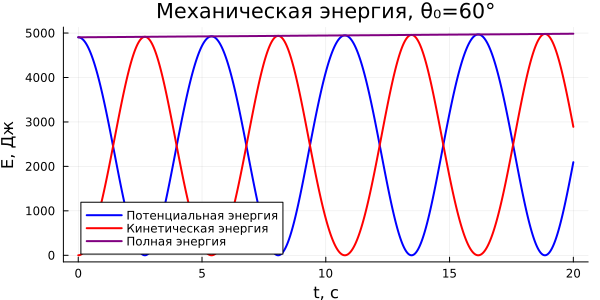

In [6]:
plot(t, get_U(theta2), line = (2, :blue), lab = "Потенциальная энергия")
plot!(t, get_K(w2), line = (2, :red), lab = "Кинетическая энергия")
plot!(t, get_U(theta2) + get_K(w2), line = (2, :purple), lab = "Полная энергия")
plot!(title = "Механическая энергия, θ₀=$(round(Int,theta02*180/pi))°", 
    xlab = "t, с", ylab = "E, Дж", size = (600, 300))


Изменение полной энергии незначительно, и мы можем, таким образом, заключить, что временной шаг был достаточно мал. Удостоверимся, что относительное изменение невелико:

In [7]:
# Вычисляет относительную погрешность
get_error(theta, w) = begin
    E0 = get_U([theta[1]]) + get_K([w[1]])
    E1 = get_U([theta[end]]) + get_K([w[end]])
    return abs( ( (E0 - E1)/E0 )[1] )
end

println("Относительное изменение E:")
println("Theta = $(round(Int, theta01*180/pi)): $(round(get_error(theta1, w1), digits = 3))")
println("Theta = $(round(Int, theta02*180/pi)): $(round(get_error(theta2, w2), digits = 3))")

Относительное изменение E:
Theta = 15: 0.019
Theta = 60: 0.016


## Затухающий маятник

Настоящий маятник не может колебаться вечно. Из-за трения маятник в конечном итоге замедлится и остановится.

In [8]:
# Возвращает правую часть обыкновенного дифференциального уравнения,
# описывающего затухающий простой маятник.
RHS(theta, w, dt) = begin
    dw = -sin.(theta)*dt*g/L - b/(L*m)*w*dt
    dtheta = w*dt
    return dtheta, dw
end

RHS (generic function with 1 method)

Рассмотрим $L=1\;\mathrm{m}$, $m=1\;\mathrm{kg}$ и $b=1\;\mathrm{kg\;m}$. Попробуйте другие значения самостоятельно! Для развлечения пусть шарик имеет начальную скорость.

In [9]:
g = 9.81    # м/с². Ускорение свободного падения
m = 1.      # кг. Масса
L = 1.      # м. Длина стержня
w0 = 10     # 1/с. Начальная угловая скорость
theta0 = 3. # рад. Начальный угол
T = 20.     # с. Время моделирования
n = 100000  # Количество шагов
b = .5      # кг*м. Коэффициент затухания

t = range(0, T, n)
theta, _ = euler_method(theta0, w0, T/n, n);


In [10]:
t = t[1:200:end]
theta = theta[1:200:end];

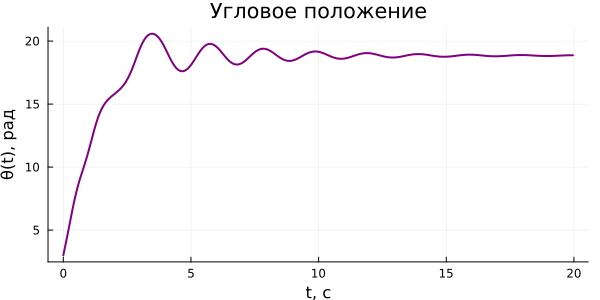

In [11]:
plot(t, theta, line = (2, :purple), lab = "")
plot!(title = "Угловое положение", xlab = "t, с", ylab = "θ(t), рад", size = (600, 300))

## Анимация

┌ Info: Saved animation to /Users/ellait/Desktop/Лабы Петрович/pendulum.gif
└ @ Plots /Users/ellait/.julia/packages/Plots/ju9dp/src/animation.jl:156


Plots.AnimatedGif("/Users/ellait/Desktop/Лабы Петрович/pendulum.gif")
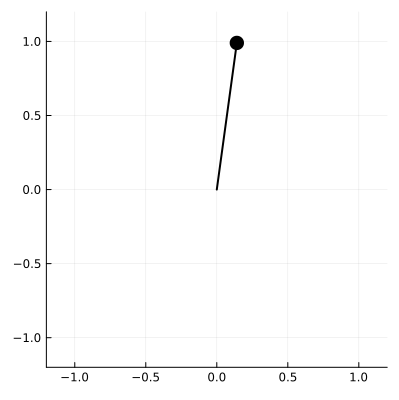

In [12]:
x = sin.(theta)
y = -cos.(theta)


anim = @animate for i ∈ 1:length(x)
    plot([0.0, x[i]], [0.0, y[i]], legend = false, line = (2, :black),
        xlim = (-1.2,1.2), ylim = (-1.2,1.2), size = (400, 400) )
    scatter!([x[i]], [y[i]], m = (8, :black))
end
gif(anim, "pendulum.gif", fps = 20)